# About Data

# import all necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split , GridSearchCV, KFold
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, auc, roc_curve 
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier , StackingClassifier , GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB

## import the data

In [3]:
df = pd.read_csv("loan_data.csv")

In [4]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [5]:
df.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,45000.0,27.764178,6.045108,20.00,24.00,26.00,30.00,144.00
person_income,45000.0,80319.053222,80422.498632,8000.00,47204.00,67048.00,95789.25,7200766.00
person_emp_exp,45000.0,5.410333,6.063532,0.00,1.00,4.00,8.00,125.00
loan_amnt,45000.0,9583.157556,6314.886691,500.00,5000.00,8000.00,12237.25,35000.00
loan_int_rate,45000.0,11.006606,2.978808,5.42,8.59,11.01,12.99,20.00
loan_percent_income,45000.0,0.139725,0.087212,0.00,0.07,0.12,0.19,0.66
cb_person_cred_hist_length,45000.0,5.867489,3.879702,2.00,3.00,4.00,8.00,30.00
credit_score,45000.0,632.608756,50.435865,390.00,601.00,640.00,670.00,850.00
loan_status,45000.0,0.222222,0.415744,0.00,0.00,0.00,0.00,1.00


In [9]:
num_cols = [i for i in df.columns if df[i].dtypes != 'object']

In [10]:
num_cols

['person_age',
 'person_income',
 'person_emp_exp',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length',
 'credit_score',
 'loan_status']

In [11]:
df[num_cols].groupby(df['loan_status']).mean().T

loan_status,0,1
person_age,27.833571,27.521300
person_income,86157.040743,59886.096900
person_emp_exp,5.476714,5.178000
loan_amnt,9219.576914,10855.689800
loan_int_rate,10.477981,12.856794
loan_percent_income,0.121783,0.202521
cb_person_cred_hist_length,5.898286,5.759700
credit_score,632.814914,631.887200
loan_status,0.000000,1.000000


In [12]:
obj_cols = [i for i in df.columns if df[i].dtypes == 'object']

In [13]:
obj_cols

['person_gender',
 'person_education',
 'person_home_ownership',
 'loan_intent',
 'previous_loan_defaults_on_file']

## The data contains outliers, so we treat the outliers using the quantile method

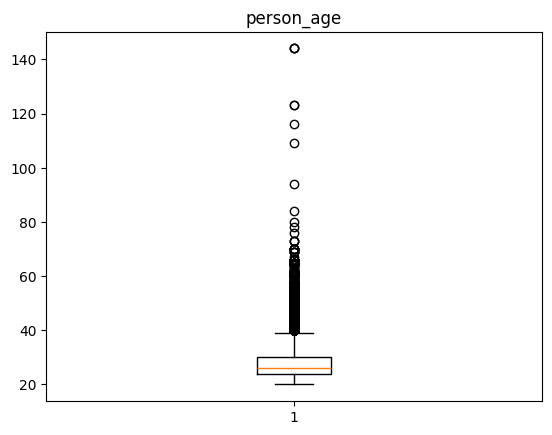

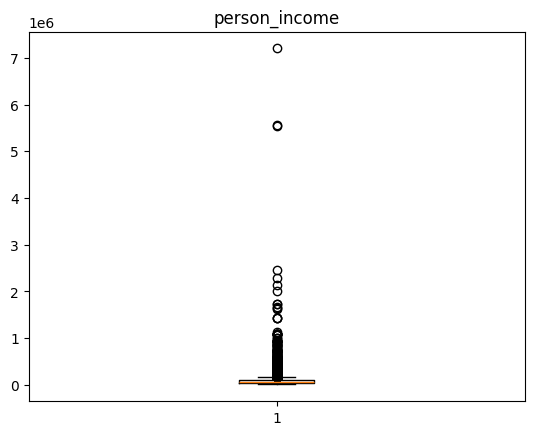

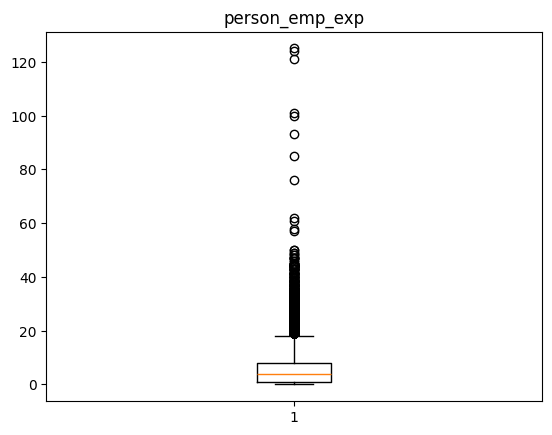

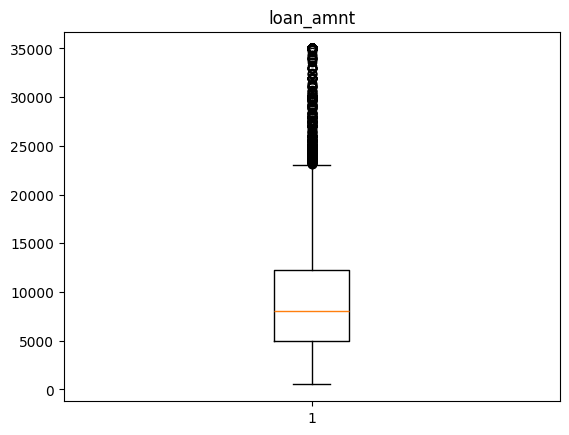

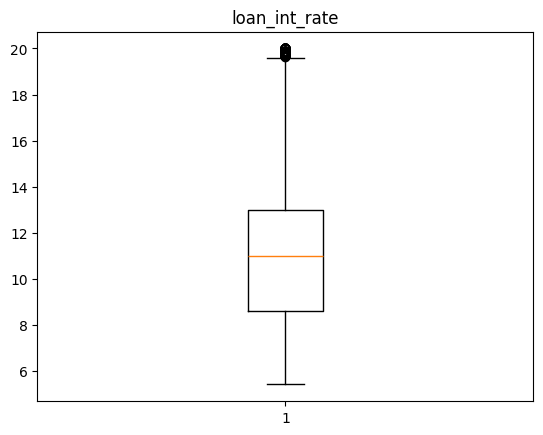

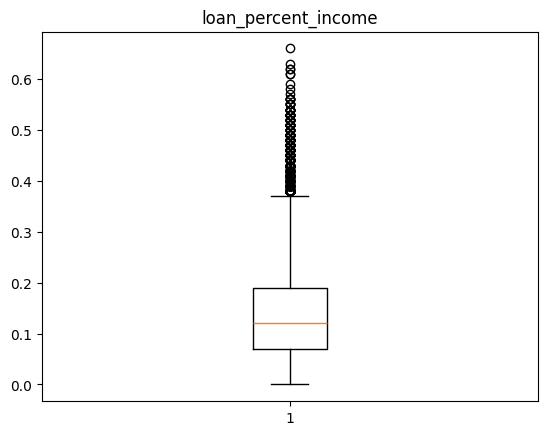

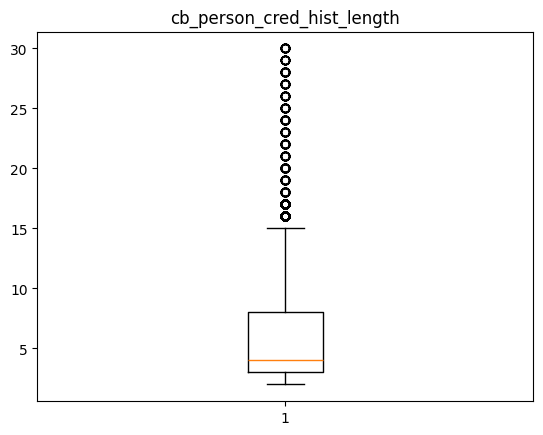

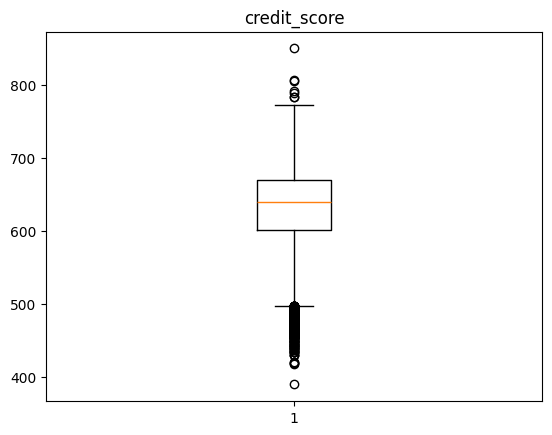

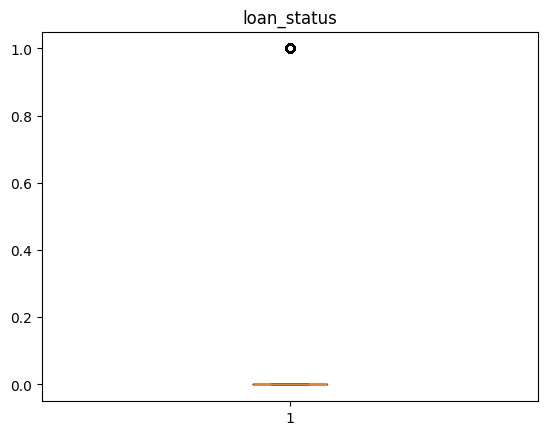

In [14]:
for i in df[num_cols]:
    plt.boxplot(df[i])
    plt.title(i)
    plt.show()

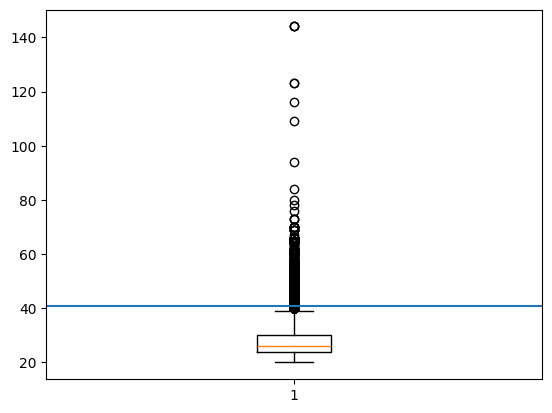

In [15]:
a = df['person_age'].quantile(0.96)
plt.boxplot(df['person_age'])
plt.axhline(a)
plt.show()
df = df[df['person_age'] <= df['person_age'].quantile(0.96)]

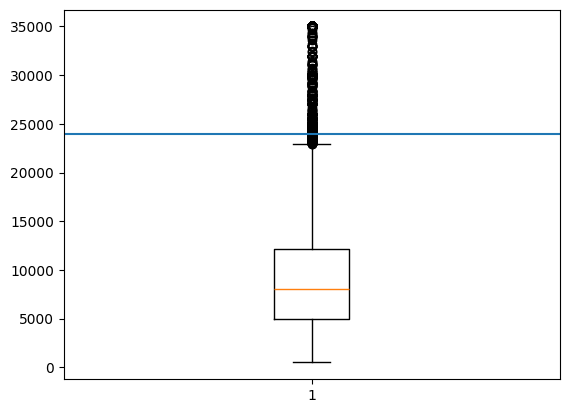

In [16]:
b = df['loan_amnt'].quantile(0.95)
plt.boxplot(df['loan_amnt'])
plt.axhline(b)
plt.show()
df = df[df['loan_amnt'] <= df['loan_amnt'].quantile(0.96)]

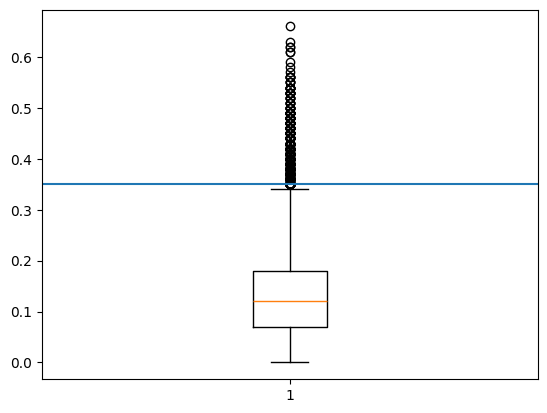

In [17]:
c = df['loan_percent_income'].quantile(0.98)
plt.boxplot(df['loan_percent_income'])
plt.axhline(c)
plt.show()
df = df[df['loan_percent_income'] <= df['loan_percent_income'].quantile(0.98)]

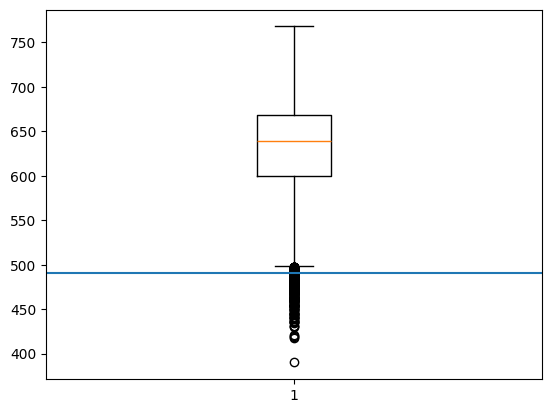

In [18]:
d = df['credit_score'].quantile(0.008)
plt.boxplot(df['credit_score'])
plt.axhline(d)
plt.show()
df = df[df['credit_score'] >= df['credit_score'].quantile(0.008)]

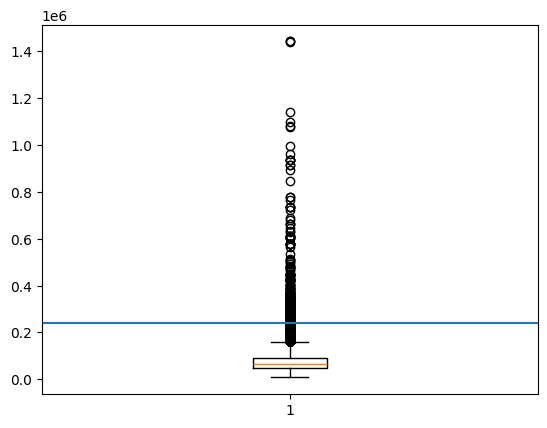

In [19]:
e = df['person_income'].quantile(0.99)
plt.boxplot(df['person_income'])
plt.axhline(e)
plt.show()
df = df[df['person_income'] <= df['person_income'].quantile(0.99)]

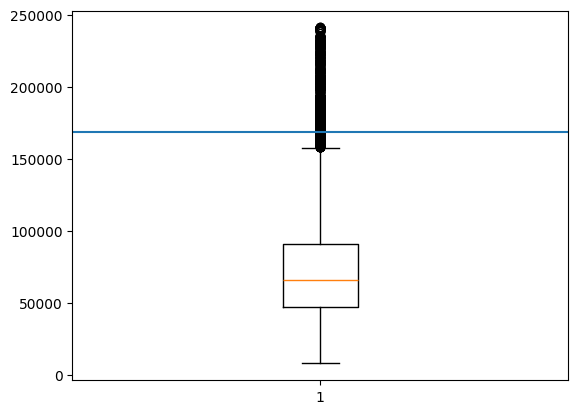

In [20]:
f = df['person_income'].quantile(0.97)
plt.boxplot(df['person_income'])
plt.axhline(f)
plt.show()
df = df[df['person_income'] <= df['person_income'].quantile(0.97)]

In [21]:
df.reset_index(drop=True, inplace=True)

## Data Distributions

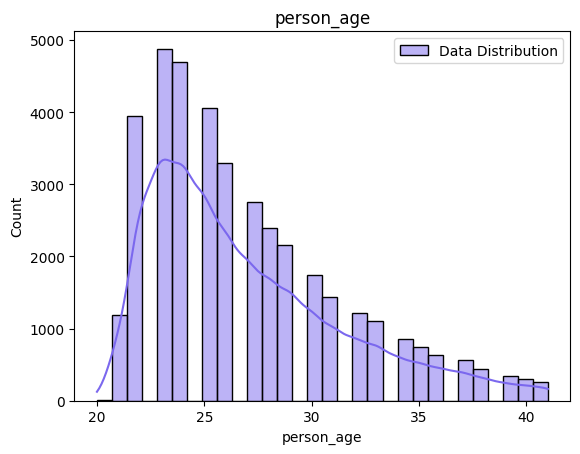

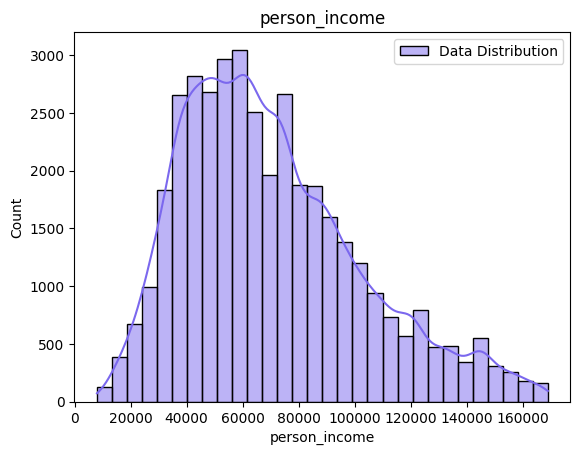

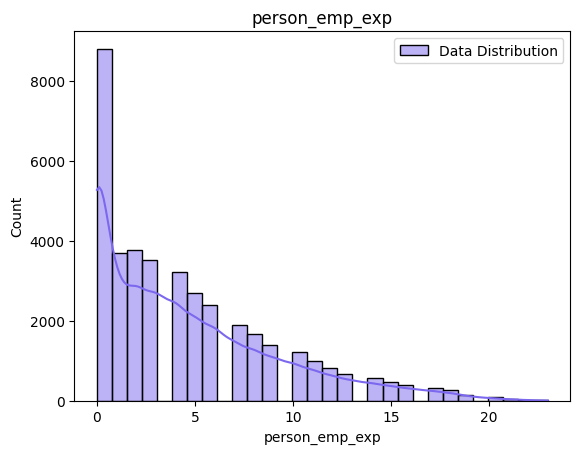

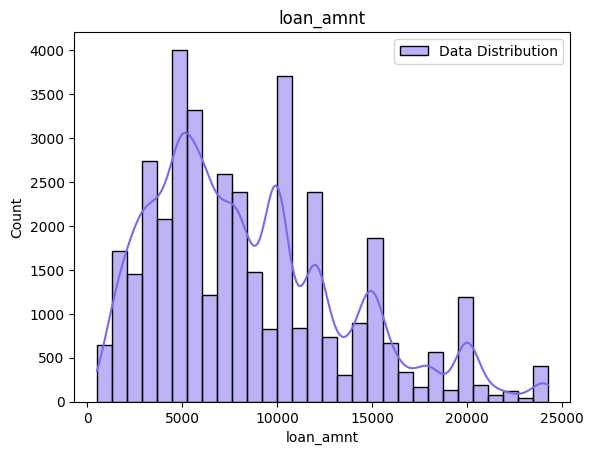

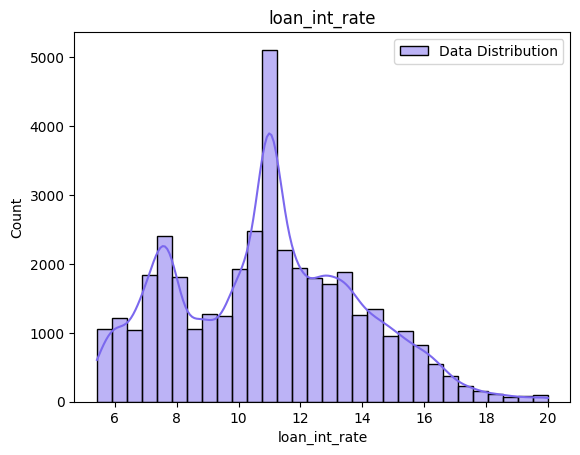

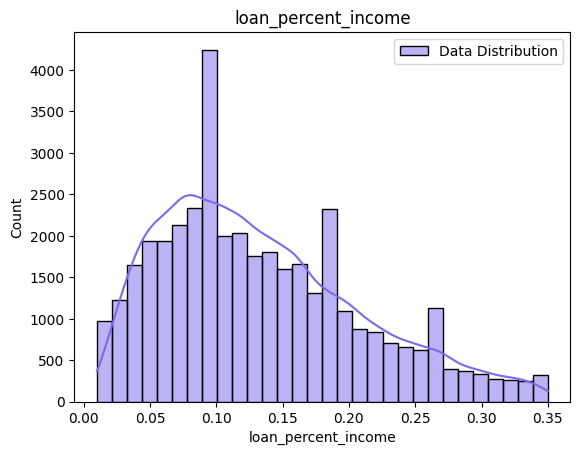

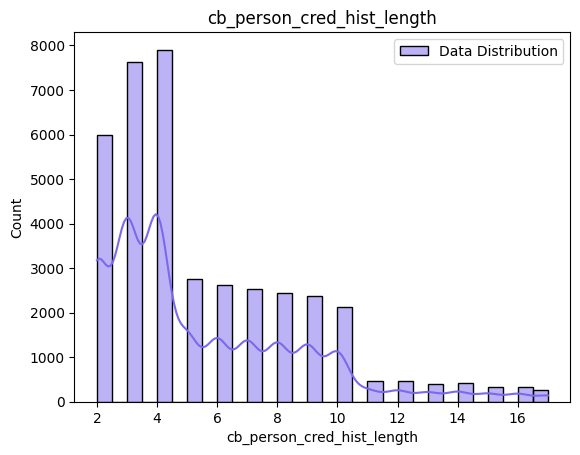

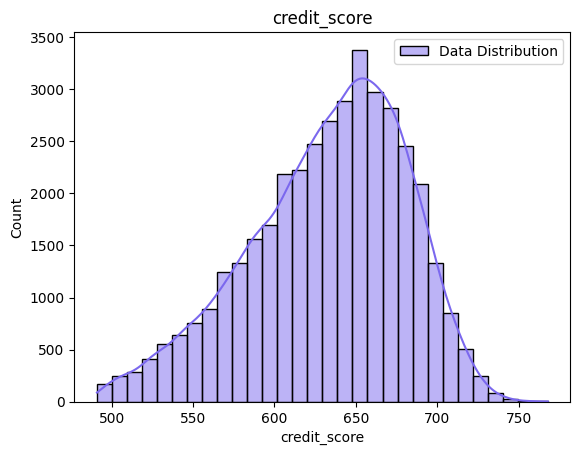

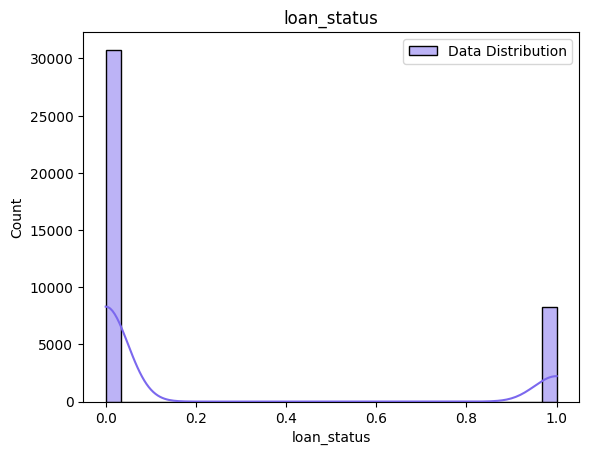

In [22]:
for i in df[num_cols]:
    sns.histplot(df[i], bins=30, kde=True, color='mediumslateblue',label='Data Distribution')
    plt.legend()
    plt.title(i)
    plt.show()

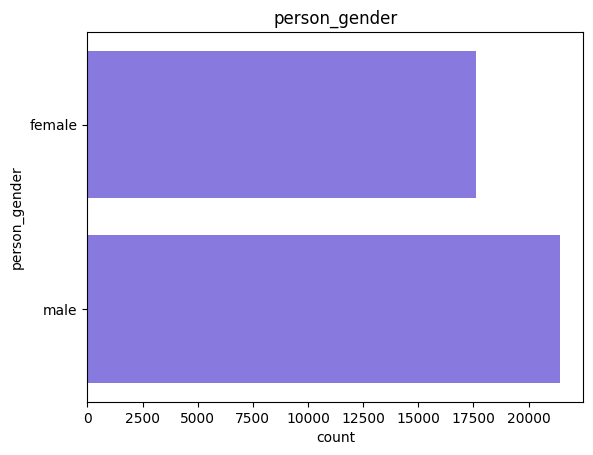

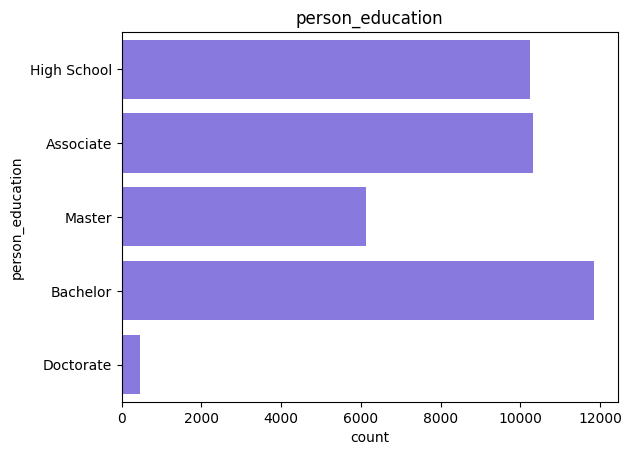

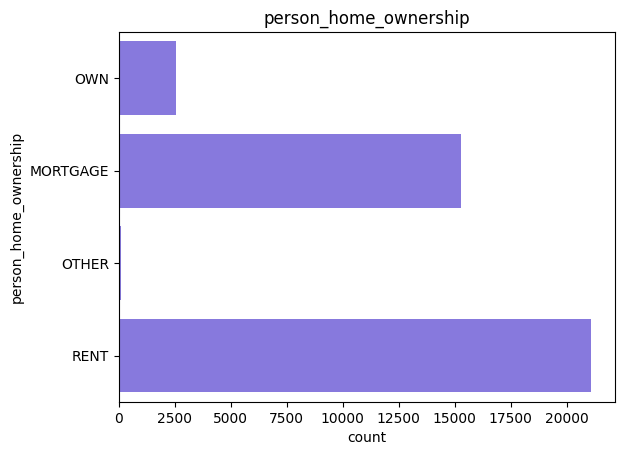

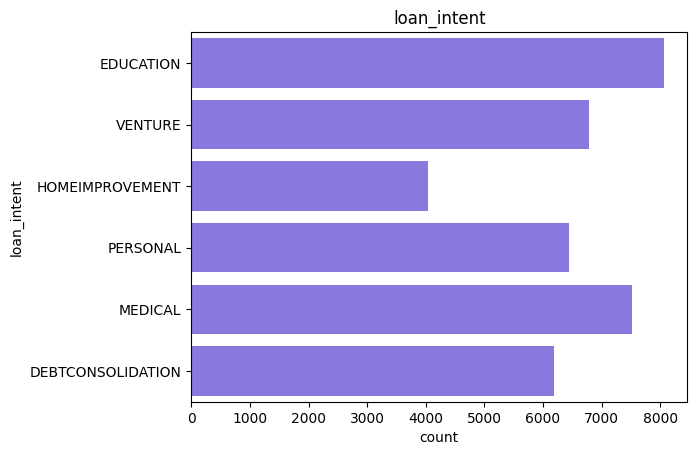

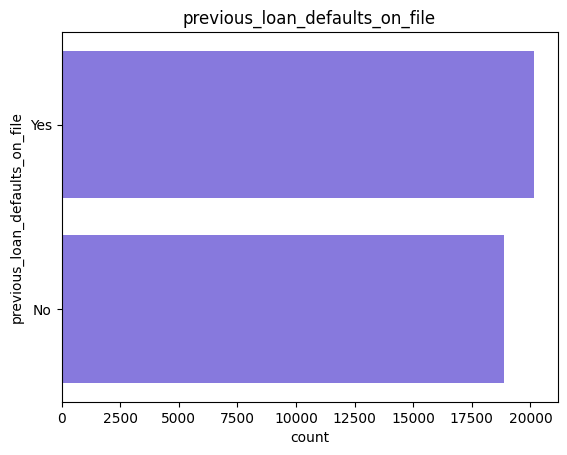

In [23]:
for i in df[obj_cols]:
    sns.countplot(df[i], color='mediumslateblue',fill=True)
    plt.title(i)
    plt.show()

In [24]:
df[num_cols].head()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
0,21.0,12282.0,0,1000.0,11.14,0.08,2.0,504,0
1,21.0,12951.0,0,2500.0,7.14,0.19,2.0,532,1
2,21.0,12739.0,0,1600.0,14.74,0.13,3.0,640,1
3,21.0,13113.0,0,4500.0,8.63,0.34,2.0,651,1
4,24.0,14283.0,1,1750.0,10.99,0.12,2.0,679,1


In [25]:
len(num_cols)

9

In [26]:
std_cols = num_cols.copy()[:8]

In [27]:
scaller = StandardScaler()

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39023 entries, 0 to 39022
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      39023 non-null  float64
 1   person_gender                   39023 non-null  object 
 2   person_education                39023 non-null  object 
 3   person_income                   39023 non-null  float64
 4   person_emp_exp                  39023 non-null  int64  
 5   person_home_ownership           39023 non-null  object 
 6   loan_amnt                       39023 non-null  float64
 7   loan_intent                     39023 non-null  object 
 8   loan_int_rate                   39023 non-null  float64
 9   loan_percent_income             39023 non-null  float64
 10  cb_person_cred_hist_length      39023 non-null  float64
 11  credit_score                    39023 non-null  int64  
 12  previous_loan_defaults_on_file  

In [29]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
1,21.0,female,High School,12951.0,0,OWN,2500.0,VENTURE,7.14,0.19,2.0,532,No,1
2,21.0,female,High School,12739.0,0,OWN,1600.0,VENTURE,14.74,0.13,3.0,640,No,1
3,21.0,female,Associate,13113.0,0,OWN,4500.0,HOMEIMPROVEMENT,8.63,0.34,2.0,651,No,1
4,24.0,female,Master,14283.0,1,MORTGAGE,1750.0,EDUCATION,10.99,0.12,2.0,679,No,1


In [30]:
df['person_gender'] = df['person_gender'].map({'male':1 , 'female':0})

In [31]:
df['person_education'].value_counts()

person_education
Bachelor       11849
Associate      10319
High School    10249
Master          6139
Doctorate        467
Name: count, dtype: int64

In [32]:
df['person_home_ownership'].value_counts()

person_home_ownership
RENT        21101
MORTGAGE    15279
OWN          2549
OTHER          94
Name: count, dtype: int64

In [33]:
df['loan_intent'].value_counts()

loan_intent
EDUCATION            8058
MEDICAL              7522
VENTURE              6791
PERSONAL             6438
DEBTCONSOLIDATION    6184
HOMEIMPROVEMENT      4030
Name: count, dtype: int64

In [34]:
df['previous_loan_defaults_on_file'].value_counts()

previous_loan_defaults_on_file
Yes    20148
No     18875
Name: count, dtype: int64

In [35]:
df['loan_status'].value_counts()

loan_status
0    30778
1     8245
Name: count, dtype: int64

## The data is biased for '0' in the loan_status column. The data is imbalanced; it could affect the model, so we have to balance the data

In [36]:
from sklearn.utils import resample

In [37]:
approved_data = df[df['loan_status'] == 1]

In [38]:
reject_data = df[df['loan_status'] == 0]

In [39]:
up_sample = resample(approved_data,n_samples=(len(reject_data)))

In [40]:
data = pd.concat([up_sample,reject_data])

In [41]:
data.shape

(61556, 14)

In [42]:
data['loan_status'].value_counts()

loan_status
1    30778
0    30778
Name: count, dtype: int64

## now the data is balanced

In [43]:
data['previous_loan_defaults_on_file'] = data['previous_loan_defaults_on_file'].map({'Yes':1 , 'No':0})

In [44]:
obj_cols = [i for i in data.columns if data[i].dtypes == 'object']

In [45]:
obj_cols

['person_education', 'person_home_ownership', 'loan_intent']

## perform LabelEncoding on Categorical feature

In [46]:
encod = LabelEncoder()

In [47]:
for i in data[obj_cols]:
    data[i] = encod.fit_transform(data[i])

In [48]:
data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
4989,22.0,1,3,47865.0,0,0,5000.0,5,18.21,0.10,4.0,622,0,1
292,25.0,0,0,73028.0,1,3,20000.0,1,11.01,0.27,2.0,654,0,1
36763,34.0,0,1,41807.0,10,3,3162.0,4,10.06,0.08,8.0,660,0,1
37127,27.0,1,1,95627.0,8,3,3739.0,0,14.50,0.04,8.0,654,0,1
6875,25.0,0,4,116378.0,0,3,6500.0,3,14.61,0.06,2.0,655,0,1


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61556 entries, 4989 to 36611
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      61556 non-null  float64
 1   person_gender                   61556 non-null  int64  
 2   person_education                61556 non-null  int64  
 3   person_income                   61556 non-null  float64
 4   person_emp_exp                  61556 non-null  int64  
 5   person_home_ownership           61556 non-null  int64  
 6   loan_amnt                       61556 non-null  float64
 7   loan_intent                     61556 non-null  int64  
 8   loan_int_rate                   61556 non-null  float64
 9   loan_percent_income             61556 non-null  float64
 10  cb_person_cred_hist_length      61556 non-null  float64
 11  credit_score                    61556 non-null  int64  
 12  previous_loan_defaults_on_file  61

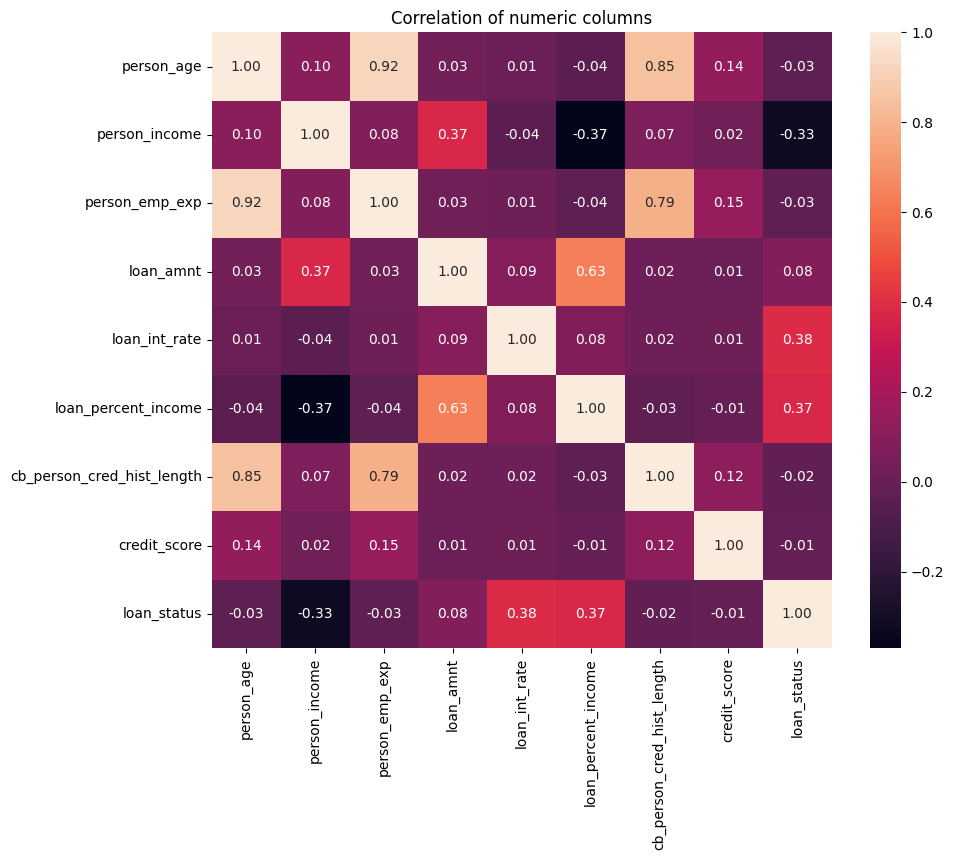

In [50]:
plt.figure(figsize=(10,8))
sns.heatmap(data[num_cols].corr(),annot=True,fmt='.2f')
plt.title('Correlation of numeric columns')
plt.show()

## Numerical columns in the data are well correlated with each other.

## Now, split the data and apply standardization to the data.

In [51]:
X = data.drop('loan_status', axis=1)
y = data['loan_status']

In [52]:
X_tr , X_te , y_tr , y_te = train_test_split(X, y, train_size=0.7, random_state=66)

In [53]:
X_tr_scal = scaller.fit_transform(X_tr)

In [54]:
X_te_scal = scaller.transform(X_te)

In [55]:
RF = RandomForestClassifier(n_estimators=70)

In [56]:
RF.fit(X_tr_scal , y_tr)

RandomForestClassifier(n_estimators=70)

In [57]:
RF.score(X_tr_scal,y_tr)

1.0

In [58]:
y_pred = RF.predict(X_te_scal)

In [59]:
accuracy_score(y_pred , y_te)

0.9646396274435479

In [60]:
print(classification_report(y_pred,y_te))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      8894
           1       0.99      0.94      0.97      9573

    accuracy                           0.96     18467
   macro avg       0.96      0.97      0.96     18467
weighted avg       0.97      0.96      0.96     18467



<Axes: >

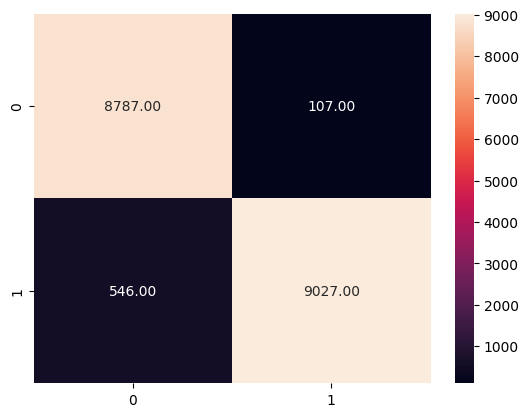

In [61]:
sns.heatmap(confusion_matrix(y_pred,y_te) , annot = True  , fmt='.2f')

In [62]:
y_prb = RF.predict_proba(X_te_scal)[:,1]

In [63]:
fpr,tpr,threshold = roc_curve(y_te,y_prb)

In [64]:
roc_score = auc(fpr,tpr)

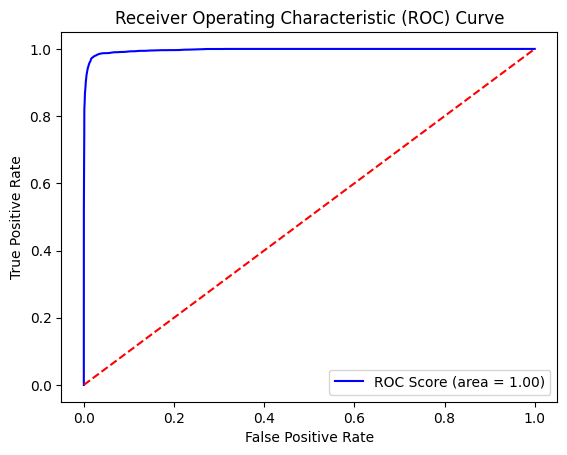

In [65]:
plt.plot(fpr, tpr, color='blue', label='ROC Score (area = %0.2f)' % roc_score)
plt.plot([0, 1], [0, 1], color='red', linestyle='--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Logistic Regression

In [66]:
LR = LogisticRegression()

In [67]:
LR.fit(X_tr_scal, y_tr)

LogisticRegression()

In [68]:
LR.score(X_tr_scal,y_tr)

0.8766506532989858

In [69]:
y_pr = LR.predict(X_te_scal)

In [70]:
accuracy_score(y_pr,y_te)

0.8673850652515298

In [71]:
print(classification_report(y_pr,y_te))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86      8322
           1       0.92      0.83      0.87     10145

    accuracy                           0.87     18467
   macro avg       0.87      0.87      0.87     18467
weighted avg       0.87      0.87      0.87     18467



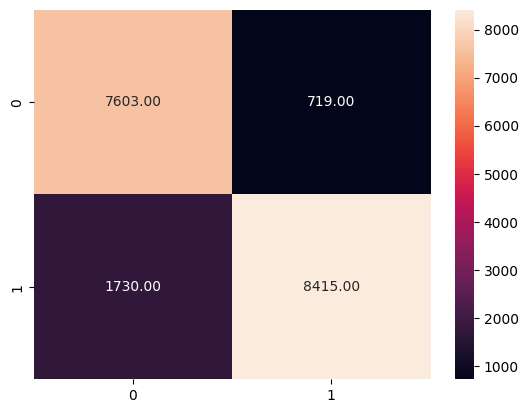

In [72]:
sns.heatmap(confusion_matrix(y_pr,y_te), annot = True, fmt='.2f')
plt.show()

In [73]:
y_prb_lr = LR.predict_proba(X_te_scal)[:,1]

In [74]:
fpr, tpr, thresholds = roc_curve(y_te,y_prb_lr)

In [75]:
roc_score1 = auc(fpr,tpr)

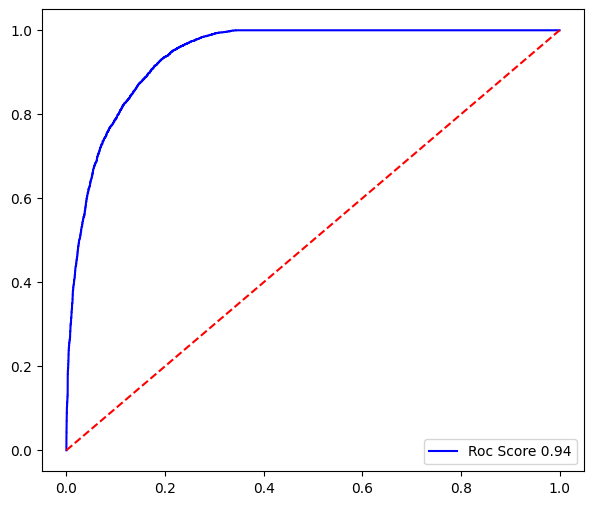

In [76]:
plt.figure(figsize=(7,6))
plt.plot(fpr,tpr, color='blue', label = 'Roc Score %0.2f' %roc_score1)
plt.legend()
plt.plot([0,1],[0,1],color='red', linestyle='--')
plt.show()

# Decision Tree

In [77]:
DT = DecisionTreeClassifier()

In [78]:
DT.fit(X_tr_scal,y_tr)

DecisionTreeClassifier()

In [79]:
DT.score(X_tr_scal,y_tr)

1.0

In [80]:
y_pr_dt = DT.predict(X_te_scal)

In [81]:
accuracy_score(y_pr_dt,y_te)

0.9538636486706016

In [82]:
print(classification_report(y_pr_dt,y_te))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      8747
           1       0.99      0.93      0.95      9720

    accuracy                           0.95     18467
   macro avg       0.95      0.96      0.95     18467
weighted avg       0.96      0.95      0.95     18467



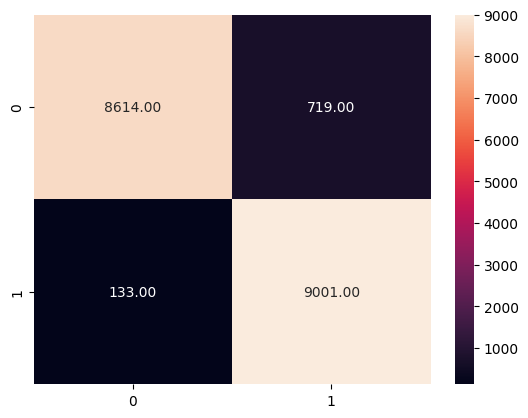

In [83]:
sns.heatmap(confusion_matrix(y_te , y_pr_dt), annot=True , fmt = '.2f')
plt.show()

In [84]:
y_prb_dt = DT.predict_proba(X_te_scal)[:,1]

In [85]:
fpr, tpr, thresholds = roc_curve(y_te,y_prb_dt)

In [86]:
roc_score2 = auc(fpr,tpr)

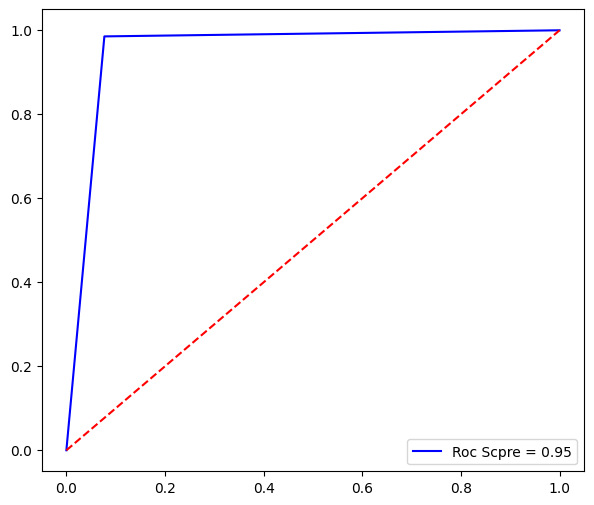

In [87]:
plt.figure(figsize=(7,6))
plt.plot(fpr,tpr,color='blue', label = 'Roc Scpre = %0.2f'% roc_score2)
plt.legend()
plt.plot([0,1],[0,1],linestyle='--',color='red')
plt.show()

# hyperparameter Tunning using GridSearchCV

In [88]:
param = { 
    "criterion": ["gini", "entropy"],
    "splitter": ["best", "random"],
    "max_depth": [1, 2, 3, 4, 5, 6, 7, 8, 9],
    "max_features": [1, 2, 3, 4, 5, 6, 7, 8],
    "max_leaf_nodes": [1, 2, 3, 4, 5, 6]
}

In [89]:
gdcv = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param,n_jobs=-1,cv=10,verbose=True)

In [90]:
gdcv.fit(X_tr_scal,y_tr)

Fitting 10 folds for each of 1728 candidates, totalling 17280 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': [1, 2, 3, 4, 5, 6, 7, 8],
                         'max_leaf_nodes': [1, 2, 3, 4, 5, 6],
                         'splitter': ['best', 'random']},
             verbose=True)

In [91]:
gdcv.score(X_tr_scal,y_tr)

0.7381234189700387

In [92]:
y_pr_gd = gdcv.predict(X_te_scal)

In [93]:
accuracy_score(y_te,y_pr_gd)

0.7303839280879406

In [94]:
gdcv.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 6,
 'max_leaf_nodes': 6,
 'splitter': 'best'}

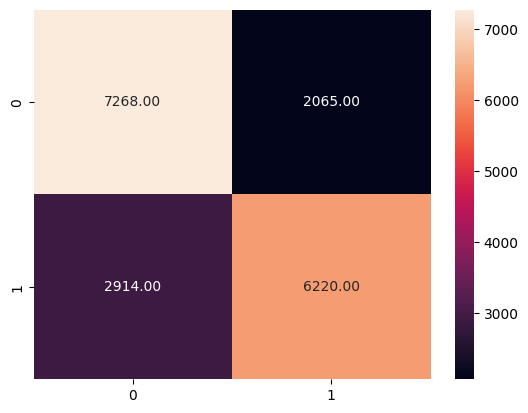

In [95]:
sns.heatmap(confusion_matrix(y_te,y_pr_gd),annot=True,fmt='.2f')
plt.show()

In [96]:
y_prb_gd = gdcv.predict_proba(X_te_scal)[:,1]

In [97]:
fpr,tpr,thresholds = roc_curve(y_te,y_prb_gd)

In [98]:
roc_score4 = auc(fpr,tpr)

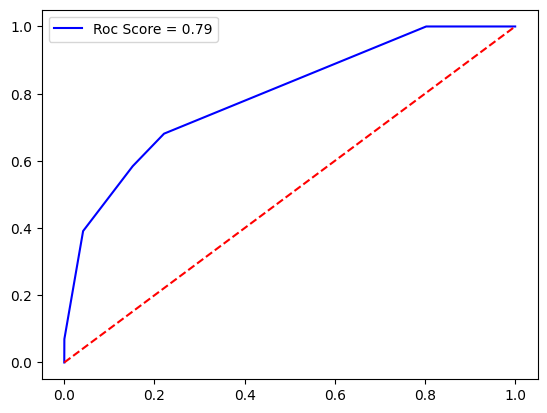

In [99]:
plt.plot(fpr,tpr, color='blue', label='Roc Score = %0.2f'%roc_score4)
plt.plot([0,1],[0,1],color='red', linestyle='--')
plt.legend()
plt.show()

# tunned Dicision tree

In [100]:
TDS = DecisionTreeClassifier(criterion='gini',max_depth=7,max_features=8,max_leaf_nodes=6,splitter='best')

In [101]:
TDS.fit(X_tr_scal,y_tr)

DecisionTreeClassifier(max_depth=7, max_features=8, max_leaf_nodes=6)

In [102]:
TDS.score(X_tr_scal,y_tr)

0.8725892919306552

In [103]:
y_pr_tds = TDS.predict(X_te_scal)

In [104]:
accuracy_score(y_te,y_pr_tds)

0.8651648887204202

In [105]:
print(classification_report(y_te,y_pr_tds))

              precision    recall  f1-score   support

           0       0.93      0.79      0.86      9333
           1       0.81      0.94      0.87      9134

    accuracy                           0.87     18467
   macro avg       0.87      0.87      0.86     18467
weighted avg       0.87      0.87      0.86     18467



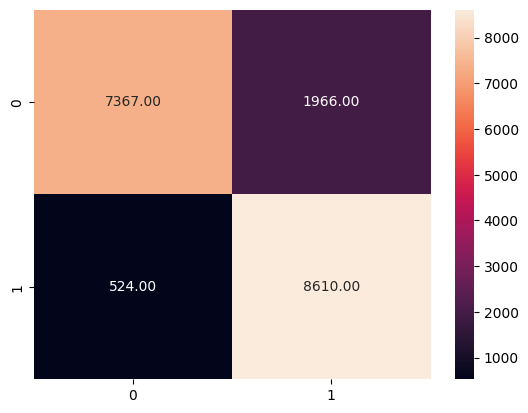

In [106]:
sns.heatmap(confusion_matrix(y_te,y_pr_tds),annot=True,fmt='.2f')
plt.show()

In [107]:
y_prb_tds = TDS.predict_proba(X_te_scal)[:,1]

In [108]:
fpr,tpr,thresholds = roc_curve(y_te,y_prb_tds)

In [109]:
roc_score5 = auc(fpr,tpr)

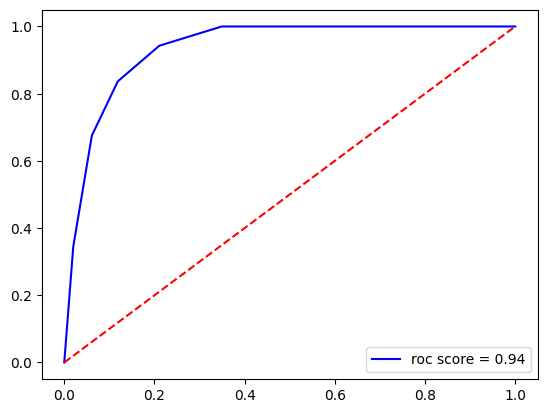

In [110]:
plt.plot(fpr,tpr, color='blue', label = 'roc score = %0.2f' % roc_score5)
plt.plot([0,1],[0,1], linestyle='--' , color='red')
plt.legend()
plt.show()

# support vector 

In [111]:
svc = SVC()

In [112]:
svc.fit(X_tr_scal,y_tr)

SVC()

In [113]:
svc.score(X_tr_scal,y_tr)

0.8950776300215832

In [114]:
y_pr_svc = svc.predict(X_te_scal)

In [115]:
accuracy_score(y_te,y_pr_svc)

0.8831970542047978

In [116]:
print(classification_report(y_te,y_pr_svc))

              precision    recall  f1-score   support

           0       0.94      0.83      0.88      9333
           1       0.84      0.94      0.89      9134

    accuracy                           0.88     18467
   macro avg       0.89      0.88      0.88     18467
weighted avg       0.89      0.88      0.88     18467



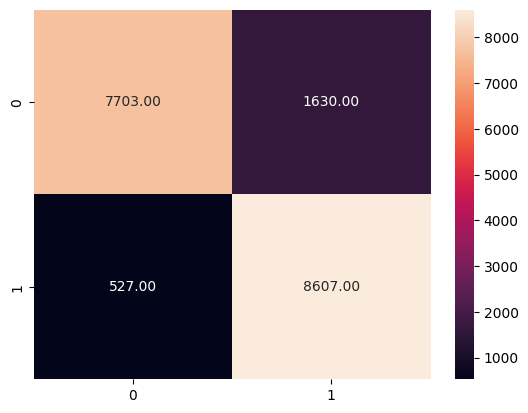

In [117]:
sns.heatmap(confusion_matrix(y_te,y_pr_svc) , annot=True, fmt='.2f')
plt.show()

# Adaboost 

In [118]:
adb = AdaBoostClassifier(n_estimators=40, estimator=RandomForestClassifier(n_estimators=40))

In [119]:
adb.fit(X_tr_scal,y_tr)

AdaBoostClassifier(estimator=RandomForestClassifier(n_estimators=40),
                   n_estimators=40)

In [120]:
adb.score(X_tr_scal,y_tr)

1.0

In [121]:
y_pr_adb = adb.predict(X_te_scal)

In [122]:
accuracy_score(y_te,y_pr_adb)

0.9654518871500515

# Stacking model

In [123]:
base_model = [

    ("dt", DecisionTreeClassifier()),
    ("rf",RandomForestClassifier(n_estimators=100 , n_jobs=-1)),
    ("ad", AdaBoostClassifier(estimator= DecisionTreeClassifier() , n_estimators= 100)),
    ("sv", SVC()),
    ("lr",LogisticRegression()),
    ("gnb",GaussianNB())
]

In [124]:
meta_model = RandomForestClassifier(n_estimators=40,n_jobs=-1)

In [125]:
model = StackingClassifier(estimators=base_model , final_estimator=meta_model,n_jobs=-1,cv=10,verbose=True)

In [126]:
model.fit(X_tr_scal,y_tr)

StackingClassifier(cv=10,
                   estimators=[('dt', DecisionTreeClassifier()),
                               ('rf', RandomForestClassifier(n_jobs=-1)),
                               ('ad',
                                AdaBoostClassifier(estimator=DecisionTreeClassifier(),
                                                   n_estimators=100)),
                               ('sv', SVC()), ('lr', LogisticRegression()),
                               ('gnb', GaussianNB())],
                   final_estimator=RandomForestClassifier(n_estimators=40,
                                                          n_jobs=-1),
                   n_jobs=-1, verbose=True)

In [127]:
model.score(X_tr_scal,y_tr)

0.9994430132980575

In [128]:
y_pr_stk = model.predict(X_te_scal)

In [129]:
accuracy_score(y_te,y_pr_stk)

0.9787729463367087

In [130]:
print(classification_report(y_te,y_pr_stk))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      9333
           1       0.98      0.97      0.98      9134

    accuracy                           0.98     18467
   macro avg       0.98      0.98      0.98     18467
weighted avg       0.98      0.98      0.98     18467



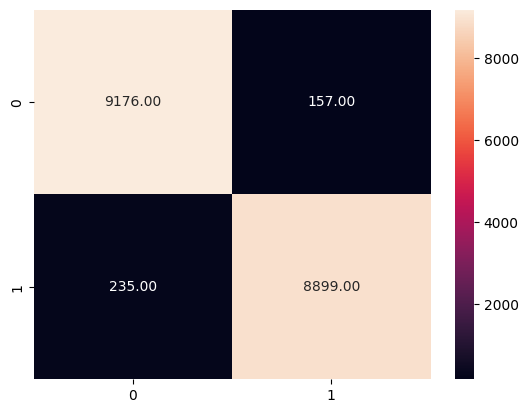

In [131]:
sns.heatmap(confusion_matrix(y_te,y_pr_stk), annot=True, fmt='.2f')
plt.show()

In [132]:
y_prb_stk = model.predict_proba(X_te_scal)[:,1]

In [133]:
fpr,tpr,thresholds = roc_curve(y_te,y_prb_stk)

In [134]:
roc_score6 = auc(fpr,tpr)

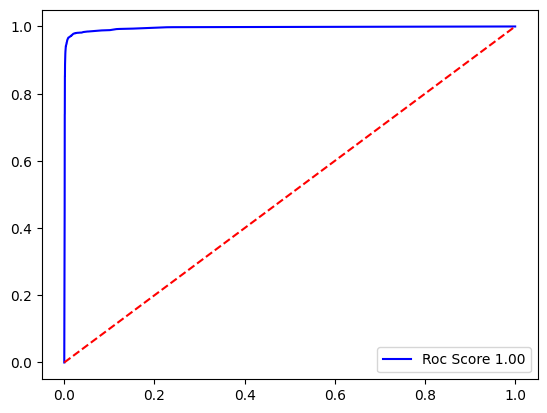

In [135]:
plt.plot(fpr,tpr, color = 'blue' , label = 'Roc Score %0.2f' %roc_score6)
plt.plot([0,1],[0,1] , color='red' , linestyle='--')
plt.legend()
plt.show()

## Compared to other algorithms, this stacking algorithm performs very well. However, after resampling the data, it could increase the outliers. So, we can treat the remaining outliers and rebuild the stacking algorithm.

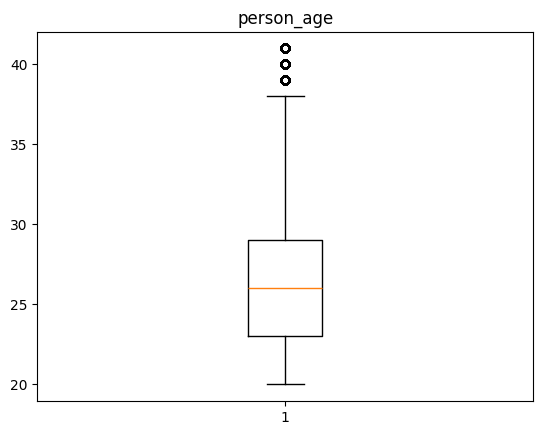

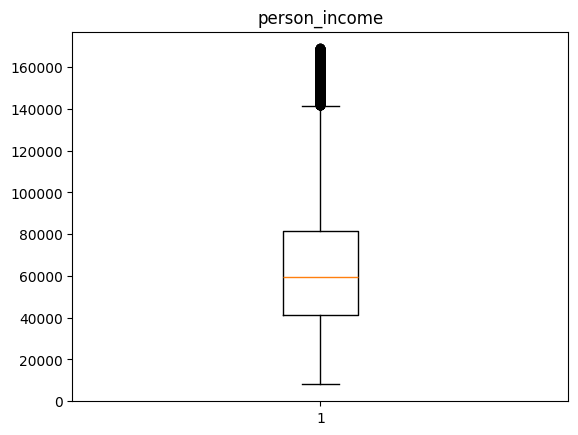

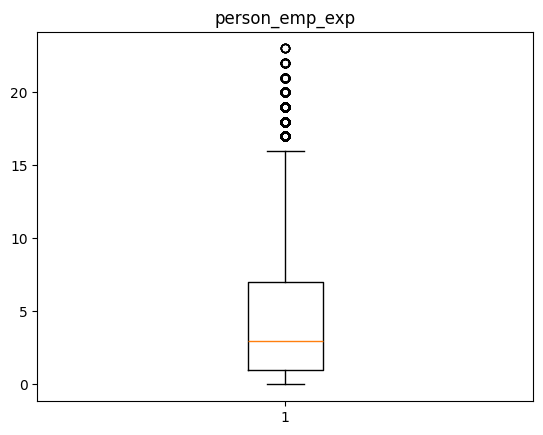

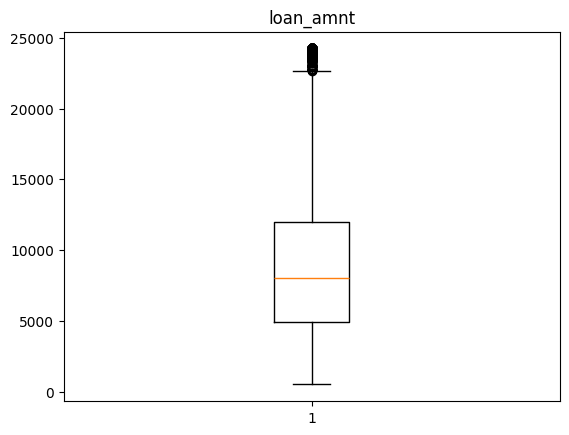

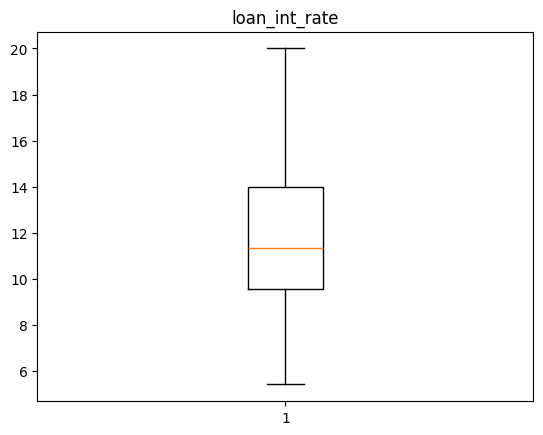

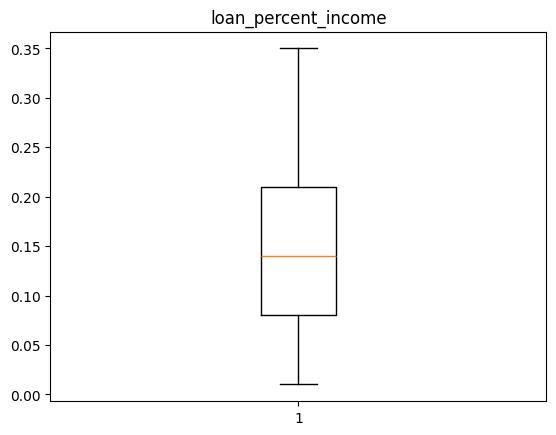

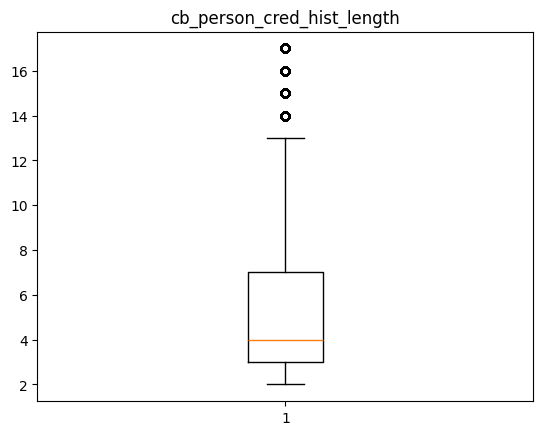

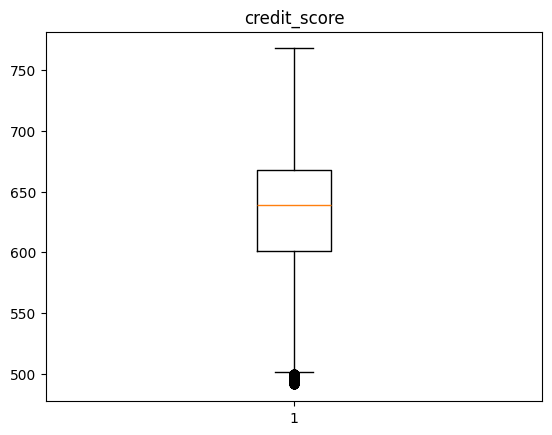

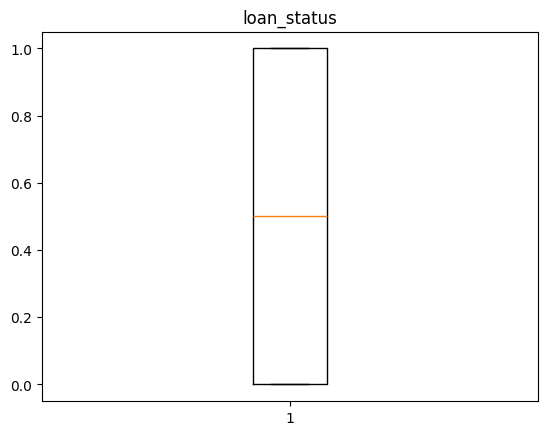

In [136]:
for i in data[num_cols]:
    plt.boxplot(data[i])
    plt.title(i)
    plt.show()

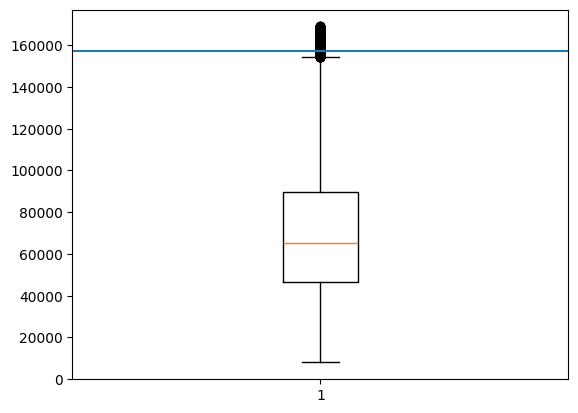

In [137]:
aa = df['person_income'].quantile(0.99)
plt.boxplot(df['person_income'])
plt.axhline(aa)
plt.show()
df = df[df['person_income'] <= df['person_income'].quantile(0.99)]

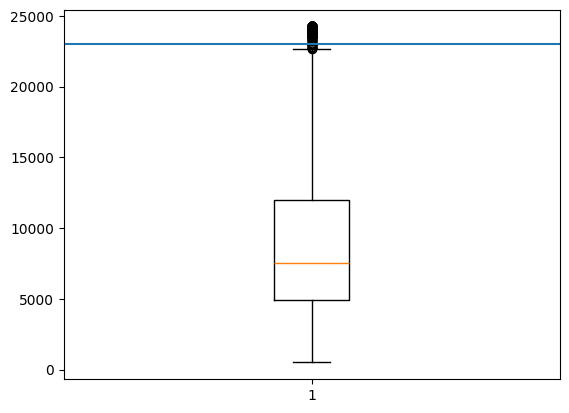

In [138]:
b = df['loan_amnt'].quantile(0.99)
plt.boxplot(df['loan_amnt'])
plt.axhline(b)
plt.show()
df = df[df['loan_amnt'] <= df['loan_amnt'].quantile(0.99)]

In [140]:
data.reset_index(inplace=True,drop=True)

In [141]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61556 entries, 0 to 61555
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      61556 non-null  float64
 1   person_gender                   61556 non-null  int64  
 2   person_education                61556 non-null  int64  
 3   person_income                   61556 non-null  float64
 4   person_emp_exp                  61556 non-null  int64  
 5   person_home_ownership           61556 non-null  int64  
 6   loan_amnt                       61556 non-null  float64
 7   loan_intent                     61556 non-null  int64  
 8   loan_int_rate                   61556 non-null  float64
 9   loan_percent_income             61556 non-null  float64
 10  cb_person_cred_hist_length      61556 non-null  float64
 11  credit_score                    61556 non-null  int64  
 12  previous_loan_defaults_on_file  

In [142]:
data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,1,3,47865.0,0,0,5000.0,5,18.21,0.10,4.0,622,0,1
1,25.0,0,0,73028.0,1,3,20000.0,1,11.01,0.27,2.0,654,0,1
2,34.0,0,1,41807.0,10,3,3162.0,4,10.06,0.08,8.0,660,0,1
3,27.0,1,1,95627.0,8,3,3739.0,0,14.50,0.04,8.0,654,0,1
4,25.0,0,4,116378.0,0,3,6500.0,3,14.61,0.06,2.0,655,0,1


In [143]:
X = data.drop('loan_status', axis=1)
y = data['loan_status']

In [144]:
X_tr, X_te , y_tr, y_te = train_test_split(X,y,train_size=0.7,random_state=55)

In [145]:
X_tr_scl = scaller.fit_transform(X_tr)

In [146]:
X_te_scl = scaller.transform(X_te)

In [147]:
base_model1 = [

    ("dt", DecisionTreeClassifier()),
    ("rf",RandomForestClassifier(n_estimators=100 , n_jobs=-1)),
    ("ad", AdaBoostClassifier(estimator= DecisionTreeClassifier() , n_estimators= 100)),
    ("sv", SVC()),
    ("lr",LogisticRegression()),
    ("gnb",GaussianNB())
]

In [148]:
meta_model1 = RandomForestClassifier(n_estimators=40,n_jobs=-1)

In [149]:
model1 = StackingClassifier(estimators=base_model1 , final_estimator=meta_model1,n_jobs=-1,cv=10,verbose=True)

In [150]:
model1.fit(X_tr_scl,y_tr)

StackingClassifier(cv=10,
                   estimators=[('dt', DecisionTreeClassifier()),
                               ('rf', RandomForestClassifier(n_jobs=-1)),
                               ('ad',
                                AdaBoostClassifier(estimator=DecisionTreeClassifier(),
                                                   n_estimators=100)),
                               ('sv', SVC()), ('lr', LogisticRegression()),
                               ('gnb', GaussianNB())],
                   final_estimator=RandomForestClassifier(n_estimators=40,
                                                          n_jobs=-1),
                   n_jobs=-1, verbose=True)

In [151]:
model1.score(X_tr_scl,y_tr)

0.9996750910905335

In [152]:
y_pr_stk1 = model1.predict(X_te_scl)

In [153]:
accuracy_score(y_te,y_pr_stk1)

0.9777982346889045

In [154]:
print(classification_report(y_te,y_pr_stk1))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      9137
           1       0.98      0.97      0.98      9330

    accuracy                           0.98     18467
   macro avg       0.98      0.98      0.98     18467
weighted avg       0.98      0.98      0.98     18467



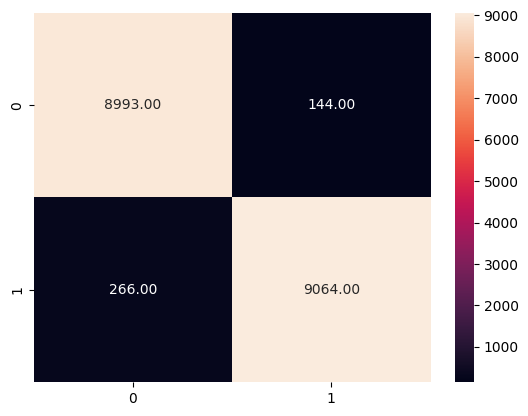

In [155]:
sns.heatmap(confusion_matrix(y_te,y_pr_stk1), annot=True, fmt='.2f')
plt.show()

In [156]:
y_prb_stk1 = model.predict_proba(X_te_scl)[:,1]

In [157]:
fpr,tpr,thresholds = roc_curve(y_te,y_prb_stk1)

In [158]:
roc_score7 = auc(fpr,tpr)

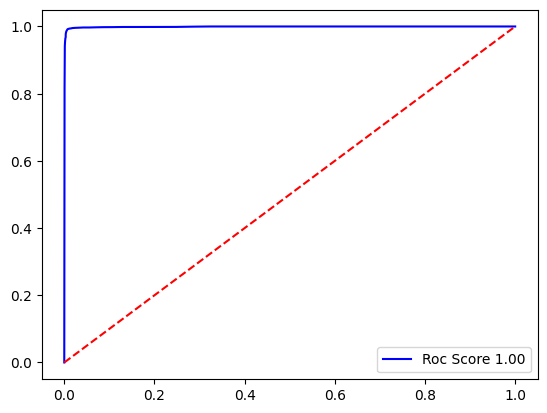

In [159]:
plt.plot(fpr,tpr, color = 'blue' , label = 'Roc Score %0.2f' %roc_score7)
plt.plot([0,1],[0,1] , color='red' , linestyle='--')
plt.legend()
plt.show()

In [160]:
import joblib

In [161]:
joblib.dump(model1,'Bank Loan Approval Classification.pkl')

['Bank Loan Approval Classification.pkl']